# **CROP_RECOMMENDATION_SYSTEM**


In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from __future__ import print_function
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


**IMPORTING DATA**

---



In [2]:
crop=pd.read_csv("Crop_recommendation.csv")
df=crop

In [3]:
crop

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [4]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
crop.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [6]:
crop.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [7]:
crop.isna().sum()#null values sum

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [8]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


## data visualization

<Axes: xlabel='P', ylabel='Density'>

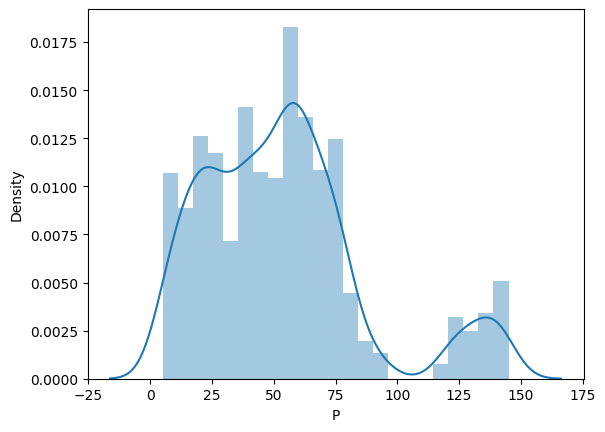

In [9]:
sns.distplot(crop['P'])

In [10]:
corr=crop.corr()
corr

ValueError: could not convert string to float: 'rice'

###confusion_matrix

<Axes: >

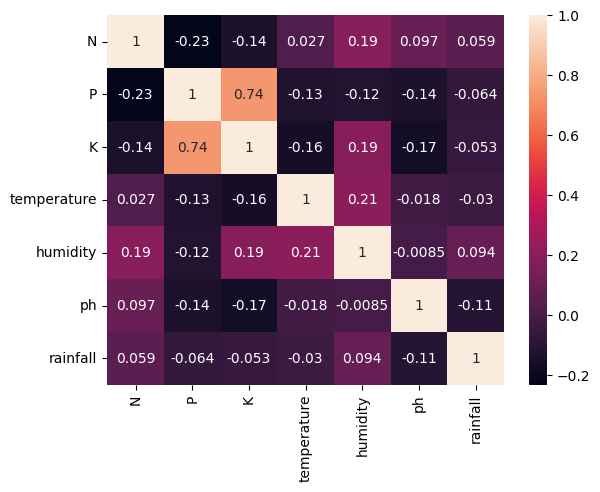

In [ ]:
sns.heatmap(corr,annot=True,cbar=True)
#we can see that their is a positive correlation between phosphurus and potasium

In [ ]:
crop["label"].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [ ]:
crop

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [ ]:
X = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
y = df['label']


In [ ]:
y

0         rice
1         rice
2         rice
3         rice
4         rice
         ...  
2195    coffee
2196    coffee
2197    coffee
2198    coffee
2199    coffee
Name: label, Length: 2200, dtype: object

In [ ]:
X

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [ ]:
X.shape

(2200, 7)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
acc=[]
model=[]

In [ ]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(X_train,y_train)
x=(accuracy_score(y_test,NaiveBayes.predict(X_test)))
acc.append(x)
model.append('GAUSSIAN_NAVIE_BAYES')
x

0.9939393939393939

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Assuming you have loaded your data into X_train and X_test, and your target variables in y_train and y_test.

# Create a RandomForestClassifier
RF = RandomForestClassifier(random_state=0)

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300,400],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Create a GridSearchCV object with RandomForestClassifier and the hyperparameter grid
grid_search = GridSearchCV(estimator=RF, param_grid=param_grid, scoring='accuracy', cv=3)

# Fit the model with GridSearch to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best parameters and the corresponding best accuracy score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Create a RandomForestClassifier with the best hyperparameters
best_RF = RandomForestClassifier(random_state=0, **best_params)

# Fit the best model on the entire training set
best_RF.fit(X_train, y_train)

# Make predictions on the test set
predicted_values = best_RF.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predicted_values)
x=accuracy
# Print the best hyperparameters and the accuracy
print("Best Hyperparameters:", best_params)
print("Best Accuracy:", accuracy)
acc.append(x)
model.append('RANDOM FOREST')

Best Hyperparameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 400}
Best Accuracy: 0.990909090909091


In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

bg=BaggingClassifier()
bg.fit(X_train,y_train)
x=(accuracy_score(y_test,bg.predict(X_test)))
acc.append(x)
model.append('BAGGING_CLASSIFIER')
x

0.9878787878787879

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

gbc=GradientBoostingClassifier()
gbc.fit(X_train,y_train)
ypred=gbc.predict(X_test)
# Calculate accuracy
x=(accuracy_score(y_test,gbc.predict(X_test)))
acc.append(x)
model.append('GRADIENT_BOOSTING_CLASSIFIER')

accuracy = accuracy_score(y_test, ypred)
print("Accuracy:", accuracy)

# Calculate precision with 'weighted' averaging
precision = precision_score(y_test, ypred, average='weighted')
print("Precision:", precision)

# Calculate recall with 'weighted' averaging
recall = recall_score(y_test, ypred, average='weighted')
print("Recall:", recall)

# Calculate F1-score with 'weighted' averaging
f1 = f1_score(y_test, ypred, average='weighted')
print("F1 Score:", f1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, ypred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9833333333333333
Precision: 0.9843896068965352
Recall: 0.9833333333333333
F1 Score: 0.9831644752992027
Confusion Matrix:
[[34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 33  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 28  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 33  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0 36  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0 25  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 3

In [ ]:
from sklearn.tree import ExtraTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

et=ExtraTreeClassifier()
et.fit(X_train,y_train)
ypred=et.predict(X_test)
x=(accuracy_score(y_test,et.predict(X_test)))
acc.append(x)
model.append('EXTRA_TREE_CLASSIFIER')
# Calculate accuracy
accuracy = accuracy_score(y_test, ypred)
print("Accuracy:", accuracy)

# Calculate precision with 'weighted' averaging
precision = precision_score(y_test, ypred, average='weighted')
print("Precision:", precision)

# Calculate recall with 'weighted' averaging
recall = recall_score(y_test, ypred, average='weighted')
print("Recall:", recall)

# Calculate F1-score with 'weighted' averaging
f1 = f1_score(y_test, ypred, average='weighted')
print("F1 Score:", f1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, ypred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9121212121212121
Precision: 0.9147140020684735
Recall: 0.9121212121212121
F1 Score: 0.9118314309407949
Confusion Matrix:
[[32  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0 24  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 29  3  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  2 26  0  0  1  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 28  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  3  0  0 28  0  0  0  0  0  0  0  0  1  0  0  2  0]
 [ 0  0  0  0  0  0  0  0  0 35  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0 20  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  1  0  0  0  0 21  0  2  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0 3

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
ypred=dt.predict(X_test)
x=(accuracy_score(y_test,dt.predict(X_test)))
acc.append(x)
model.append('DECISION_TREE_CLASSIFIER')
# Calculate accuracy
accuracy = accuracy_score(y_test, ypred)
print("Accuracy:", accuracy)

# Calculate precision with 'weighted' averaging
precision = precision_score(y_test, ypred, average='weighted')
print("Precision:", precision)

# Calculate recall with 'weighted' averaging
recall = recall_score(y_test, ypred, average='weighted')
print("Recall:", recall)

# Calculate F1-score with 'weighted' averaging
f1 = f1_score(y_test, ypred, average='weighted')
print("F1 Score:", f1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, ypred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9818181818181818
Precision: 0.982426158513115
Recall: 0.9818181818181818
F1 Score: 0.9815889193115738
Confusion Matrix:
[[34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 33  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 28  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 32  0  0  0  0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  0  0  0 36  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 26  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 32

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svc=SVC()
svc.fit(X_train,y_train)
ypred=svc.predict(X_test)
x=(accuracy_score(y_test,svc.predict(X_test)))
acc.append(x)
model.append('SUPPORT_VECTOR_CLASSIFIER')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knb=KNeighborsClassifier()
knb.fit(X_train,y_train)
ypred=knb.predict(X_test)
x=(accuracy_score(y_test,knb.predict(X_test)))
acc.append(x)
model.append('KNEIGHBOURS_CLASSIFIER')

In [ ]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

# Assuming you have already loaded your data into X_train and X_test, and your target variables in y_train and y_test.

# Encode the target variables
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Create an XGBoost classifier
XGB = xgb.XGBClassifier()

# Define the hyperparameter grid to search
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'min_child_weight': [1, 2, 3]
}

# Create a GridSearchCV object with XGBoost classifier and hyperparameter grid
grid_search = GridSearchCV(estimator=XGB, param_grid=param_grid, scoring='accuracy', cv=3)

# Fit the model with GridSearch to find the best hyperparameters
grid_search.fit(X_train, y_train_encoded)

# Get the best parameters and the corresponding best accuracy score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Create an XGBoost classifier with the best hyperparameters
best_XGB = xgb.XGBClassifier(**best_params)

# Fit the best model on the entire training set
best_XGB.fit(X_train, y_train_encoded)

# Make predictions on the test set
predicted_values = best_XGB.predict(X_test)

# Calculate accuracy
accuracy = metrics.accuracy_score(y_test_encoded, predicted_values)

# Print the best hyperparameters and the accuracy
print("Best Hyperparameters:", best_params)
print("Best Accuracy:", accuracy)
x=accuracy
acc.append(x)
model.append('XGBOOST')


ModuleNotFoundError: No module named 'xgboost'

In [ ]:
for i in range(0,9):
  print(f"accuarcy:{acc[i]} of {model[i]}")

accuarcy:0.9939393939393939 of GAUSSIAN_NAVIE_BAYES
accuarcy:0.990909090909091 of RANDOM FOREST
accuarcy:0.9878787878787879 of BAGGING_CLASSIFIER
accuarcy:0.9833333333333333 of GRADIENT_BOOSTING_CLASSIFIER
accuarcy:0.9121212121212121 of EXTRA_TREE_CLASSIFIER
accuarcy:0.9818181818181818 of DECISION_TREE_CLASSIFIER
accuarcy:0.9636363636363636 of SUPPORT_VECTOR_CLASSIFIER
accuarcy:0.9772727272727273 of KNEIGHBOURS_CLASSIFIER
accuarcy:0.9848484848484849 of XGBOOST


<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

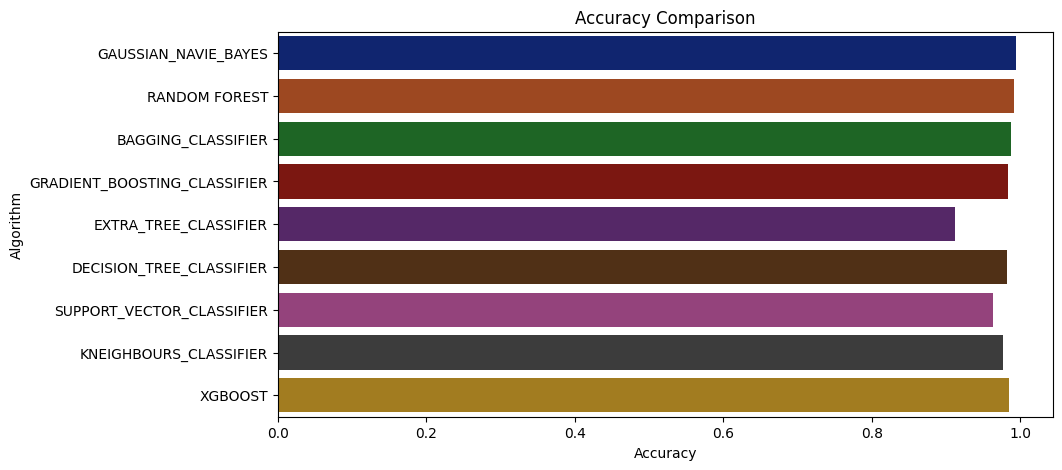

In [ ]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

##saving the model

In [ ]:
import pickle
pickle.dump(NaiveBayes,open("model_NaiveBayes.pkl","wb"))

In [ ]:
# best model
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
d=X.iloc[100]
prediction = NaiveBayes.predict(np.array([d]))
print(prediction[0])

maize
